In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from tqdm import tqdm
sns.set()

In [105]:
data = pd.read_csv('/Users/vishesh.javangula@ibm.com/juypter_notebooks/human_activity_kmeans/train-2.csv')

### Pre-processing

Before using k-means and PCA, I made sure all the values were numeric. Since the activity column is a string, I converted them to numeric values in such a way that catagorical values closer together represent the degree of similiarty. This makes the column applciable when calculating distance for k-means. I also normalized all values since the ranges of columns can affect both k-means and PCA. For the sake of time I randomly sampled 1000 rows from the dataset. Lastly, I dropped the rn column since it would not help with determining similiarty. 

In [106]:
data.head()

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,7,STANDING,0.279,-0.0196,-0.1100,-0.997,-0.967,-0.983,-0.997,-0.966,...,0.146,-0.217,-0.5640,-0.2130,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430
1,11,STANDING,0.277,-0.0127,-0.1030,-0.995,-0.973,-0.985,-0.996,-0.974,...,0.121,0.349,0.0577,0.0807,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347
2,14,STANDING,0.277,-0.0147,-0.1070,-0.999,-0.991,-0.993,-0.999,-0.991,...,0.740,-0.564,-0.7660,0.1060,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351
3,15,STANDING,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,...,0.131,0.208,-0.0681,0.0623,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364
4,20,STANDING,0.276,-0.0170,-0.1110,-0.998,-0.991,-0.998,-0.998,-0.989,...,0.667,-0.942,-0.9660,0.2450,0.1030,0.0661,-0.412,-0.761,0.263,0.0296


In [107]:
#is my data all numerical and therefore useful?
data.dtypes

rn                                       int64
activity                                object
tBodyAcc.mean.X                        float64
tBodyAcc.mean.Y                        float64
tBodyAcc.mean.Z                        float64
                                        ...   
angle.tBodyGyroMean.gravityMean        float64
angle.tBodyGyroJerkMean.gravityMean    float64
angle.X.gravityMean                    float64
angle.Y.gravityMean                    float64
angle.Z.gravityMean                    float64
Length: 563, dtype: object

In [108]:
#convert activity into numerical catagory in which similar labels result in similar values (1,2,3,4,5,...)
data['activity'].unique()
for index, series in data.iterrows():
    if(series['activity'] == 'LAYING'): data['activity'].iloc[index] = 1
    if(series['activity'] == 'SITTING'): data['activity'].iloc[index] = 2
    if(series['activity'] == 'STANDING'): data['activity'].iloc[index] = 3 
    if(series['activity'] == 'WALKING'): data['activity'].iloc[index] = 4
    if(series['activity'] == 'WALKING_DOWNSTAIRS'): data['activity'].iloc[index] = 5
    if(series['activity'] == 'WALKING_UPSTAIRS'): data['activity'].iloc[index] = 6
data['activity'].astype('int32')
data.head()

/opt/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,7,3,0.279,-0.0196,-0.1100,-0.997,-0.967,-0.983,-0.997,-0.966,...,0.146,-0.217,-0.5640,-0.2130,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430
1,11,3,0.277,-0.0127,-0.1030,-0.995,-0.973,-0.985,-0.996,-0.974,...,0.121,0.349,0.0577,0.0807,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347
2,14,3,0.277,-0.0147,-0.1070,-0.999,-0.991,-0.993,-0.999,-0.991,...,0.740,-0.564,-0.7660,0.1060,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351
3,15,3,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,...,0.131,0.208,-0.0681,0.0623,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364
4,20,3,0.276,-0.0170,-0.1110,-0.998,-0.991,-0.998,-0.998,-0.989,...,0.667,-0.942,-0.9660,0.2450,0.1030,0.0661,-0.412,-0.761,0.263,0.0296


In [109]:
#normalize data
for column in data:
    data[column] = ((data[column]-data[column].min())/(data[column].max() - data[column].min()))
    data[column] = ((data[column]-data[column].min())/(data[column].max() - data[column].min()))

In [110]:
# drop rn
data.drop(columns='rn', inplace=True)
data['cluster'] = 0
data.head()

,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean,cluster
0,0.4,0.658979,0.49020,0.423676,0.0015,0.016170,0.0085,0.0015,0.016608,0.0085,...,0.383555,0.220799,0.387692,0.384152,0.507554,0.403720,0.074393,0.5910,0.471305,0
1,0.4,0.657331,0.49365,0.427310,0.0025,0.013138,0.0075,0.0020,0.012582,0.0075,...,0.672625,0.539293,0.538308,0.798897,0.262131,0.557567,0.074393,0.5940,0.475521,0
2,0.4,0.657331,0.49265,0.425234,0.0005,0.004042,0.0035,0.0005,0.004026,0.0040,...,0.206333,0.117316,0.551282,0.454714,0.434217,0.750126,0.075405,0.5945,0.475317,0
3,0.4,0.674629,0.51355,0.448754,0.0055,0.091966,0.0490,0.0055,0.103171,0.0560,...,0.600613,0.474846,0.528872,0.470562,0.515858,0.364002,0.135628,0.6415,0.511630,0
4,0.4,0.656507,0.49150,0.423157,0.0010,0.004042,0.0010,0.0010,0.005033,0.0015,...,0.013279,0.014857,0.622564,0.551655,0.533317,0.292107,0.120445,0.6315,0.508177,0


In [111]:
data = data.sample(n=1000).reset_index(drop=True)

In [112]:
data.shape

(1000, 563)

In [113]:
data['cluster'].unique()

array([0])

In [117]:
# takes in cluster_num and returns either WCSS or Silhouette Coeffficient depending on eval_method
def k_means(cluster_num, eval_method):
   # c_data = data.copy()
    
  
      # initialize cluster_num of centroids randomly
    centroids = np.random.rand(cluster_num,data.shape[1]-1)
    clabel = np.zeros(data.shape[0])
    
    while(True):
        delta = 0
        #For each row, calculate nearest cluster and append to column "clabel"
        for index, series in data.iterrows():
            row = series.drop(labels='cluster').to_numpy()
            dist = 999999
            for label, c in enumerate(centroids):
                #print('in c data, len is : {}'.format(len(row)))
                #print('in centroids len is : {}'.format(len(c)))
                c_dist = np.power((row - c),2).sum()
                c_dist = sqrt(c_dist)
                if(c_dist < dist):
                    dist = c_dist
                    clabel[index] = label
        data['cluster'] = clabel

            #for each clabel, get center and set each cluster to center
        for label,group in data.groupby(by='cluster'):
            c_center = group.drop(columns='cluster').mean().to_numpy()
            #print('len of c_center is {}'.format(len(c_center)))
           # print('len of centroid is {}'.format(len(centroids[int(label)])))
            delta = max(delta, sqrt(np.power((centroids[int(label)] - c_center),2).sum()))
            centroids[int(label)] = c_center

            #if change in location is less than some value, break
        if(delta < 0.01):
            break
        
    if (eval_method == 'WCSS'):
        wcss = 0
        #for each row in each cluster, sum up (distance)^2
        for label,group in data.groupby(by='cluster'):
            for index, series in group.iterrows():
                row = series.drop(labels='cluster').to_numpy()
                #print('length of row is {}, length of centroid is {}'.format(len(row), len(centroids[int(label)])))
                wcss += sqrt(np.power((centroids[int(label)] - row),2).sum())
        return wcss
            
        
#         #return after all rows
        
    if (eval_method == 'sil'):
        scores = np.zeros(data.shape[0])

        for index, series in data.iterrows(): #for every row 
            row = series.drop(labels='cluster').to_numpy()
            a = 0
            dist = [99999 for i in range(cluster_num)]
            for label, group in data.groupby(by='cluster'): #for every cluster 
                s = 0 #sum of distances within each cluster
                for c_index, c_series in group.iterrows(): #for every item in the cluster
                    c_row = c_series.drop(labels='cluster').to_numpy()
                    s +=  sqrt( np.power(row - c_row,2).sum() )
                s = s/group.shape[0] #avg distance for that cluster
                dist[int(label)] = s
            #calculate silhoutte score for this point
            try:
                a = dist[int(series['cluster'])]
                dist.remove(a)
                b = min(dist)
                scores[index] = (b-a)/max(b,a)
            except:
                print('length of dist is: {}'.format(len(dist)))
                print('dist is: {}'.format(dist))
                print('cluster num is: {}'.format(int(series['cluster'])))
                break
        return np.mean(scores)
          
    
    
            
                    
                
                
            
           
                
                
                
            
            
            #get distance to every other row
            
            #group by cluster
            
            #get a and b
            #a = get average distance to within cluster
            
            #b = get average distance to every other cluster, find smallest
            #append b - a/max(b,a)
        #return average 
    
            
        


    
    

<AxesSubplot:>

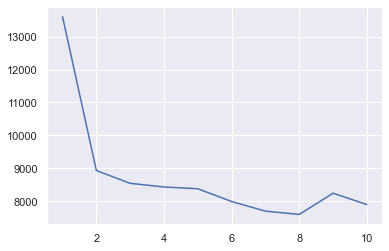

In [238]:
results = np.zeros(10)
for i in range(1,11):
    results[i-1] = k_means(i, 'WCSS')
sns.lineplot(x = [i for i in range(1,11)], y=results)


100%|██████████| 9/9 [1:14:16<00:00, 495.17s/it]


<AxesSubplot:>

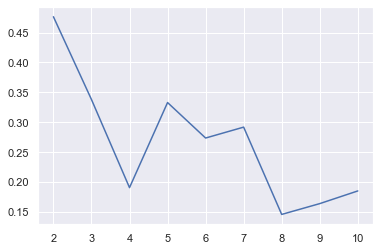

In [118]:
results = np.zeros(9)
with tqdm(total=9) as pbar:
    for i in range(2,11):
        results[i-2] = k_means(i, 'sil')
        pbar.update(1)
sns.lineplot(x = [i for i in range(2,11)], y=results)

### Discussion

In order to determine the optimal number of clusters I employed WCSS and determined the Silhouette Coefficient. When using WCSS I had to use the elbow method to decide which k to use. According to the graph, 2 is the optimal cluster number. This is confirmed with the Silhouette Coefficient graph with k=2 having the highest value.

# PCA

562


/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: ComplexWarning: Casting complex values to real discards the imaginary part


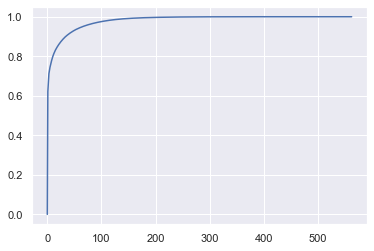

In [67]:
#get covariance matrix
cov = np.cov(data.drop(columns='cluster').to_numpy(), rowvar=False)

#get eigen values and eigen vectors
w,v = np.linalg.eig(cov)

#sort eigenvalues descending 
w = np.sort(w)
w = w[::-1]

#divide by of sum of eigenvalues
w = w/np.sum(w)

#create plot of variance percetage
cum_var = np.zeros(len(w)+1)
for index,var in enumerate(w):
    cum_var[index+1] = cum_var[index] + var 
sns.lineplot(x = [i for i in range(len(w)+1)], y=cum_var)
plt.show()
    

    


### Discussion

According to the chart, with PCA we can reduce the 563 columns to ~50 prinicple components. This was determined by picking the point where the slope starts to decrease. 